# Annual Percentage Yield (APY)

Rates
https://www.gecu.com/rates
https://www.wellsfargo.com/savings-cds/rates/

In [231]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [232]:

def apy_monthly_return(account_type,apy_rate,principal):
    year = ['January','February','March','April','May','June','July','August','September','October','November','December']
    apy_df =  pd.DataFrame(columns=['Month',
                                    'APY',
                                    'Deposit',
                                    'InterestEarned'
                                     ])
    
    for month in year:
        apy_percent = apy_rate/100
        interest_earned = principal*(apy_percent/12)
        principal += interest_earned
        df_new_row = pd.DataFrame({ 
                                    'Month':[month],
                                    'APY':[apy_rate],
                                    'Deposit':[round(principal,2)],
                                    'InterestEarned':[round(interest_earned,2)]
                                    })
        apy_df = pd.concat([apy_df, df_new_row],ignore_index=True)

    total_interest_earned = np.around(np.sum(np.array(apy_df['InterestEarned'])),2)

    print(f'--------------------------------{account_type}---------------------------')
    # print(f'If money is left in {account_type}')
    print(apy_df)
    print('===========================================================================')
    print(f'Total interest earned after 1 year in {account_type}: ${total_interest_earned}')
    print('===========================================================================')
    print('------------------------------------------------------------------------\n')
    print('')

    return  apy_df

--------------------------------GECU Savings Account---------------------------
        Month   APY    Deposit  InterestEarned
0     January  0.15  100012.50           12.50
1    February  0.15  100025.00           12.50
2       March  0.15  100037.50           12.50
3       April  0.15  100050.01           12.50
4         May  0.15  100062.52           12.51
5        June  0.15  100075.02           12.51
6        July  0.15  100087.53           12.51
7      August  0.15  100100.04           12.51
8   September  0.15  100112.56           12.51
9     October  0.15  100125.07           12.51
10   November  0.15  100137.59           12.52
11   December  0.15  100150.10           12.52
Total interest earned after 1 year in GECU Savings Account: $150.1
------------------------------------------------------------------------


--------------------------------GECU 6 month CD---------------------------
        Month  APY    Deposit  InterestEarned
0     January  3.6  100300.00          300.00


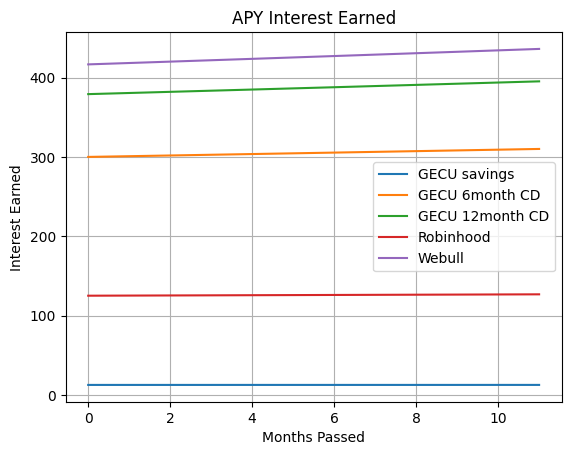

--------------------------------WellsFargo way2save Savings Account---------------------------
        Month   APY  Deposit  InterestEarned
0     January  0.15   500.06            0.06
1    February  0.15   500.13            0.06
2       March  0.15   500.19            0.06
3       April  0.15   500.25            0.06
4         May  0.15   500.31            0.06
5        June  0.15   500.38            0.06
6        July  0.15   500.44            0.06
7      August  0.15   500.50            0.06
8   September  0.15   500.56            0.06
9     October  0.15   500.63            0.06
10   November  0.15   500.69            0.06
11   December  0.15   500.75            0.06
Total interest earned after 1 year in WellsFargo way2save Savings Account: $0.72
------------------------------------------------------------------------


--------------------------------Robinhood---------------------------
        Month  APY  Deposit  InterestEarned
0     January  1.5   500.62            0.62
1    Fe

In [233]:
deposit = 100000

gecu_savings_df = apy_monthly_return('GECU Savings Account',apy_rate=0.15,principal=deposit)

gecu_6monthCD_df = apy_monthly_return('GECU 6 month CD',apy_rate=3.6,principal=deposit)
gecu_12monthCD_df = apy_monthly_return('GECU 12 month CD',apy_rate=4.55,principal=deposit)

# gecu_personal_df = apy_monthly_return('GECU free2be Checking Account',apy_rate=0.10,principal=2500)

# wells_df = apy_monthly_return('WellsFargo way2save Savings Account',apy_rate=0.15,principal=deposit)
robinhood_df = apy_monthly_return('Robinhood',apy_rate=1.5,principal=deposit)
webull_df = apy_monthly_return('Webull',apy_rate=5.0,principal=deposit)

plt.title("APY Interest Earned")
plt.plot(np.array(gecu_savings_df['InterestEarned']),label = "GECU savings")
plt.plot(np.array(gecu_6monthCD_df['InterestEarned']), label="GECU 6month CD")
plt.plot(np.array(gecu_12monthCD_df['InterestEarned']), label="GECU 12month CD")
plt.plot(np.array(robinhood_df['InterestEarned']), label="Robinhood")
plt.plot(np.array(webull_df['InterestEarned']), label="Webull")
plt.ylabel('Interest Earned')
plt.xlabel('Months Passed')
plt.grid()
plt.legend()
plt.show()

##################################################
deposit = 500
wells_df = apy_monthly_return('WellsFargo way2save Savings Account',apy_rate=0.15,principal=deposit)
robinhood_df = apy_monthly_return('Robinhood',apy_rate=1.5,principal=deposit)
webull_df = apy_monthly_return('Webull',apy_rate=5.0,principal=deposit)